# Assignment 2 - NLP PS16

**Dataset - Coursera reviews**

Group Details - Number - 46


*   Divyanshu Singh        - 2022AC05011
*   Arvind Gupta           - 2022AC05120
*   Satya Prakash Pandit   - 2022AC05040
*   Pushkar Kumar Verma    - 2022AC05272

In [2]:
# importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the CSV file
file_path = '/content/Coursera_reviews.csv'  # Replace this with the path to your CSV file
df = pd.read_csv(file_path)

In [4]:
print(df.head(5))

                                             reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id  
0  Feb 12, 2020     4.0  google-cbrs-cpi-training  
1  Sep 28, 2020     4.0  google-cbrs-cpi-training  
2  Apr 08, 2020     4.0  google-cbrs-cpi-training  
3  Feb 24, 2020     4.0  google-cbrs-cpi-training  
4  Jun 18, 2020     4.0  google-cbrs-cpi-training  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308355 entries, 0 to 308354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviews       308325 non-null  object 
 1   reviewers     308354 non-null  object 
 2   date_reviews  308354 non-null  object 
 3   rating        308354 non-null  float64
 4   course_id     308354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 11.8+ MB


In [6]:
print("Header of the CSV file:")
print(df.columns)

Header of the CSV file:
Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')



This code snippet preprocesses text data by removing punctuation, converting to lowercase, tokenizing into words, removing stopwords, and then rejoining the words into processed text. It is applied to the 'reviews' column of a DataFrame df to create a new column 'clean_reviews' with the preprocessed text.

In [7]:
import nltk
import re
from nltk.corpus import stopwords

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Remove punctuations, numbers, and special characters
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # Convert text to lowercase
        text = text.lower()
        # Tokenize text
        tokens = nltk.word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        # Join tokens back into a string
        processed_text = ' '.join(tokens)
        return processed_text
    else:
        return ""  # Return empty string if input is not a string

# Apply preprocessing to the 'reviews' column
df['clean_reviews'] = df['reviews'].apply(preprocess_text)

# Display the preprocessed text
print(df['clean_reviews'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    pretty dry able pass two complete watches happ...
1    would better experience video screen shots wou...
2    information perfect program little annoying wa...
3       grammatical mistakes test made double take bad
4    excellent course training provided detailed ea...
Name: clean_reviews, dtype: object


The output shows the first five entries of the 'clean_reviews' column in the DataFrame df after applying the text preprocessing function. Each entry is a processed version of the corresponding review, with punctuation removed, text converted to lowercase, stopwords removed, and words tokenized.

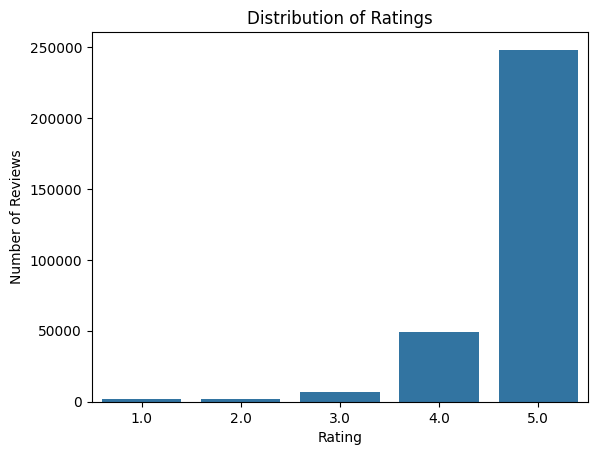

In [8]:
# Visualize the number of reviews per rating
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


This shows good ratings from the users

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Apply lemmatization to the 'clean_reviews' column
df['normalized_reviews'] = df['clean_reviews'].apply(lemmatize_text)

# Display the normalized text
print(df['normalized_reviews'].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...


0    pretty dry able pas two complete watch happy u...
1    would better experience video screen shot woul...
2    information perfect program little annoying wa...
3        grammatical mistake test made double take bad
4    excellent course training provided detailed ea...
Name: normalized_reviews, dtype: object


**This code snippet performs lemmatization on preprocessed text using NLTK's WordNet Lemmatizer, reducing words to their base form. It applies this process to the 'clean_reviews' column of a DataFrame df to create a new column 'normalized_reviews' with the lemmatized text.**

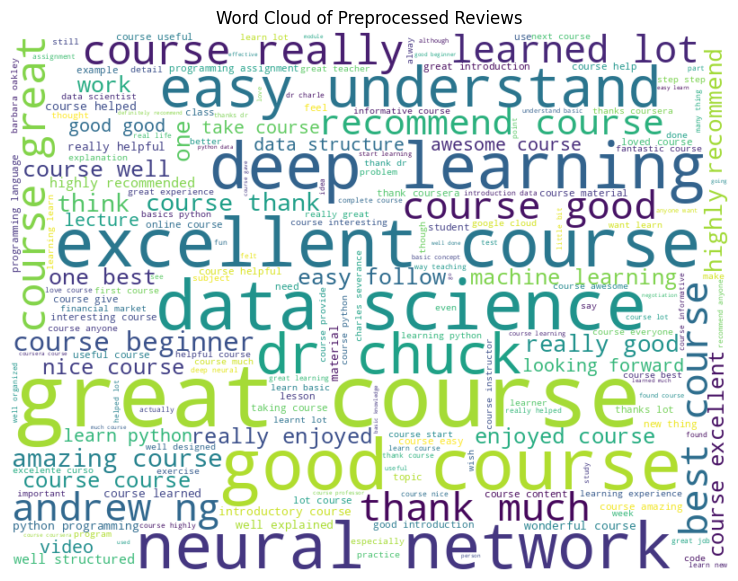

In [10]:
# Display the word cloud
from wordcloud import WordCloud

# Generate word cloud for the preprocessed reviews
text = ' '.join(df['clean_reviews'].values)
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Reviews')
plt.show()

## CFG and Parse Tree

**These parse trees demonstrate how each sentence can be broken down into its constituent parts according to the rules of the grammar.**

In [12]:
cfg = nltk.CFG.fromstring("""
S -> Adj NP | Adv VP | Adj N | NP VP
VP -> Adv V | V Adj | V NP Adj
NP -> N VP | Det N
Adv -> "very" | "well"
V -> "explained"| "was" | "explains"
Adj -> "great"| "excellent"| "online" | "great" | "clearly"
N -> "course" | "learning" | "instructor" | "concepts"
Det -> "the"
""")

parser = nltk.ChartParser(cfg)

# for simplicity , few sample reviews are taken
sentences = [
    "online learning was great",
    "very well explained",
    "excellent course",
    "great course",
    "the instructor explains the concepts clearly"
]

for sentence in sentences:
    for tree in parser.parse(sentence.split()):
        print(tree)


(S (Adj online) (NP (N learning) (VP (V was) (Adj great))))
(S (Adv very) (VP (Adv well) (V explained)))
(S (Adj excellent) (N course))
(S (Adj great) (N course))
(S
  (NP (Det the) (N instructor))
  (VP (V explains) (NP (Det the) (N concepts)) (Adj clearly)))


Gives the Right output!!

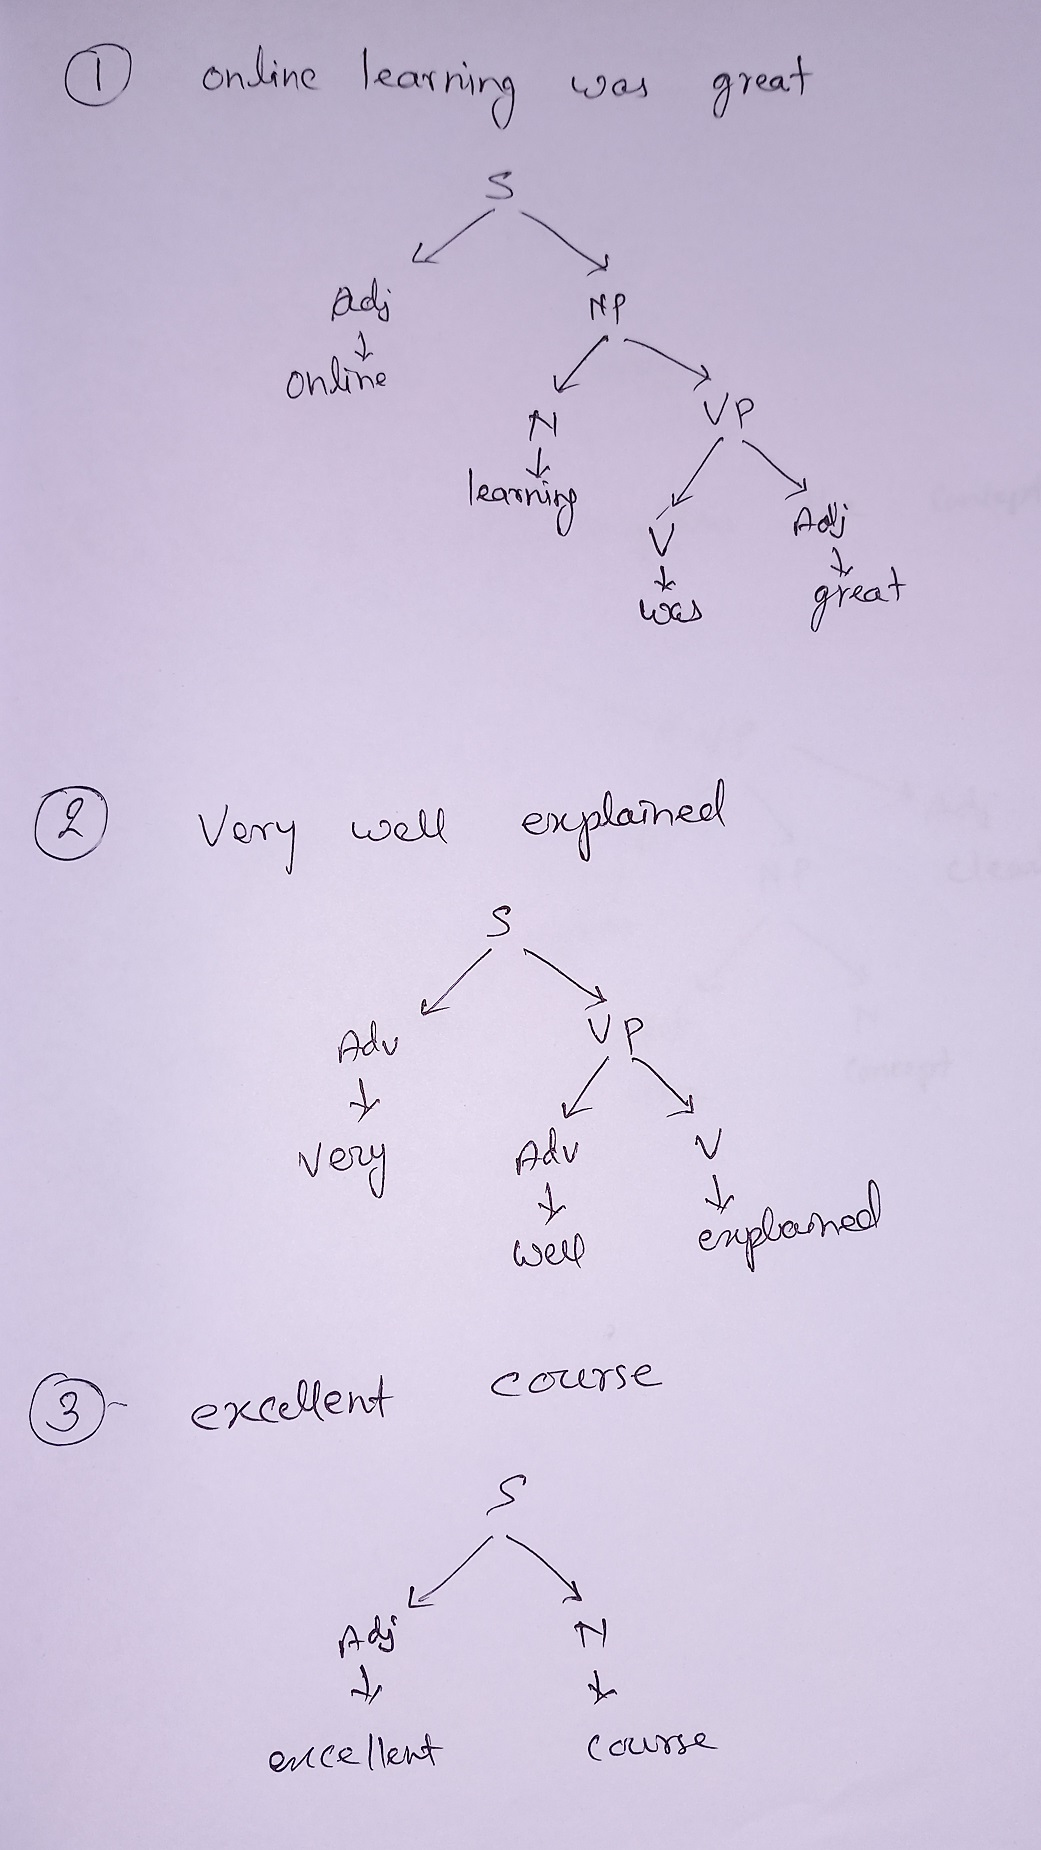

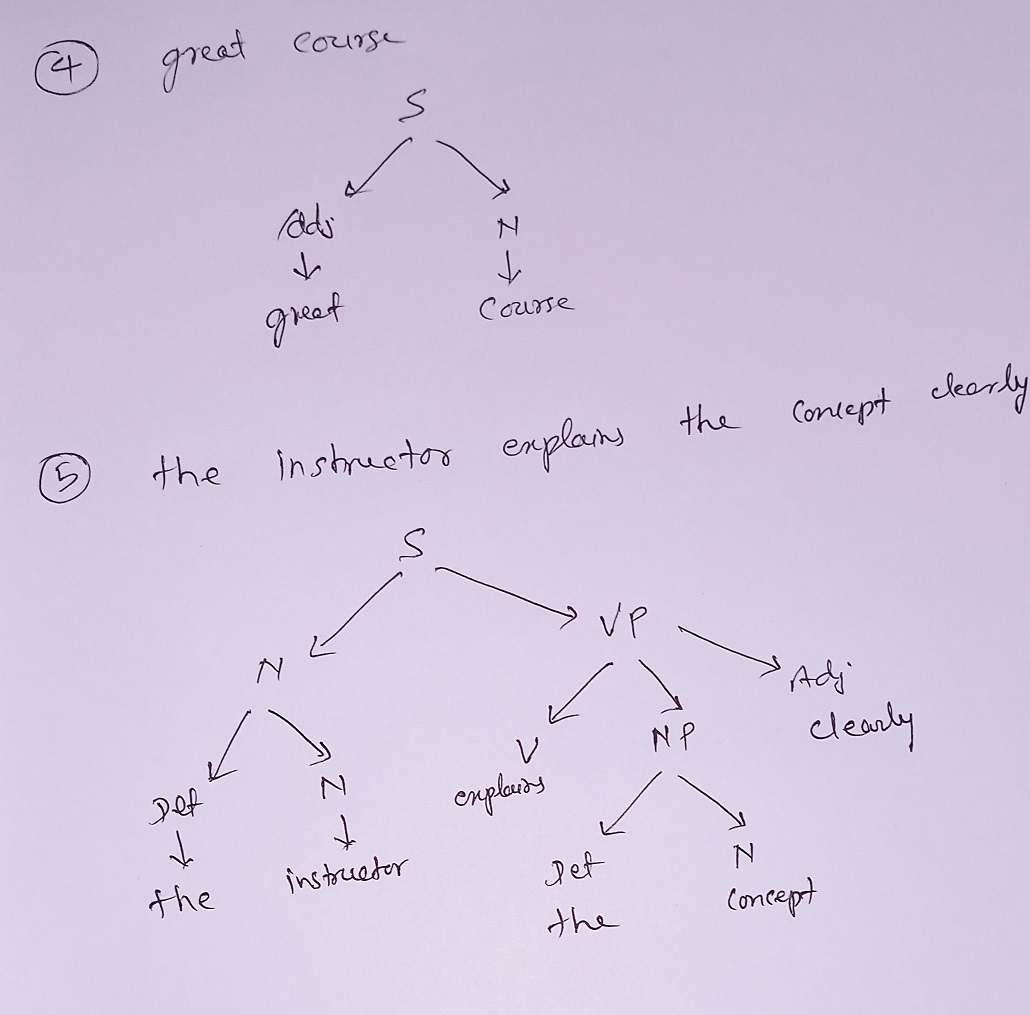

**Conclusion**

In the tasks discussed, we employed a comprehensive approach to natural language processing that involved text preprocessing, lemmatization, and syntactic parsing using context-free grammars (CFGs). Initially, text preprocessing was conducted to clean and standardize the text by removing punctuation, converting to lowercase, tokenizing, and eliminating stopwords. This step is crucial for focusing on meaningful words and reducing noise. Following this, lemmatization was applied to reduce words to their base forms, thereby simplifying the text and improving the efficiency of subsequent NLP models. The final step involved syntactic parsing with CFGs to analyze the grammatical structure of sentences, providing insights into how words are grouped and related. This process helps in tasks such as sentence analysis and machine translation. The approach highlights the importance of preprocessing and syntactic analysis in understanding and processing natural language effectively.